In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
input_path = 'H:\RediMinds\VCQI'
df_filter2_codes = pd.read_csv(input_path+"\VCQI_clean_surgical_margin.csv")

In [3]:
# sepearte traget variable from predictors for furthur processing
target = 'SURGICAL MARGIN'
X = df_filter2_codes.drop(columns=[target])
Y = df_filter2_codes[target]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957 entries, 0 to 2956
Data columns (total 34 columns):
PROC NAME                          2957 non-null int64
GENDER                             2957 non-null int64
AGE AT SURGERY                     2957 non-null float64
MARITAL STATUS                     2957 non-null int64
RACE                               2957 non-null int64
WEIGHT                             2957 non-null float64
HEIGHT                             2957 non-null float64
BMI                                2957 non-null float64
CLINICAL SIZE (mm)                 2957 non-null float64
SYMPTOMS                           2957 non-null int64
SOLITARY KIDNEY                    2957 non-null int64
BILATERALITY OF TUMOR              2957 non-null int64
SIDE OF TUMOR                      2957 non-null int64
SIDE OF SURGERY                    2957 non-null int64
FACE                               2957 non-null int64
TUMOR lOCATION                     2957 non-null int64
PRE

# Decision Tree Classifier

In [4]:
# Split data in test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
DTC = DecisionTreeClassifier()
parameter_dist = { 'max_features':['sqrt','log2',None],
                  'min_samples_leaf': [1,5,10,15,20,25,30,35,40,45,50], 
                  'class_weight' :[None,'balanced'], 
                  'random_state': [1234]}  
classifier_DTC = GridSearchCV(DTC, parameter_dist, n_jobs = -1, scoring = 'roc_auc', cv = 5 )
results_classifier_DTC = classifier_DTC.fit(x_train, y_train)
y_DTC = results_classifier_DTC.predict(x_test)


In [6]:
classifier = results_classifier_DTC
results_DTC = pd.DataFrame(classifier.predict(x_test), columns=['pred_label'])
results_DTC['pred_prob'] =  pd.DataFrame(classifier.predict_proba(x_test))[1]
results_DTC['true_label'] = np.array(y_test)

In [7]:
# Decison Tree Score Raw Data
print(classifier.best_params_)
print("\n Model Best CV score: \n" + str(classifier.best_score_))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(y_test, y_DTC)))
print("\n Confusion Matrix : \n"+str(metrics.confusion_matrix(y_test, y_DTC)))
print("\n Classification Report: \n"+ str(metrics.classification_report(y_test, y_DTC)))
print("\n AUC-ROC: \n"+ str(metrics.roc_auc_score(y_test, results_DTC['pred_prob'])))

{'class_weight': None, 'max_features': 'sqrt', 'min_samples_leaf': 40, 'random_state': 1234}

 Model Best CV score: 
0.6362399236954136

 Model Balanced Accuracy: 
0.5

 Confusion Matrix : 
[[576   0]
 [ 16   0]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       576
           1       0.00      0.00      0.00        16

    accuracy                           0.97       592
   macro avg       0.49      0.50      0.49       592
weighted avg       0.95      0.97      0.96       592


 AUC-ROC: 
0.47281901041666663


H:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classifier

In [8]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
RFC = RandomForestClassifier(random_state= 42)
parameter_dist = {'n_estimators': [5,10,20,100,200,300], 'max_features':['sqrt','log2',None],
  'min_samples_leaf': [1,5,10,20,25,30,35,40,45,50], 'class_weight' :[None,'balanced','balanced_subsample'] 
}  
classifier_RFR = GridSearchCV(RFC, parameter_dist, n_jobs = -1,cv=5, scoring = 'roc_auc', return_train_score=True)
results_classifier_RFR = classifier_RFR.fit(x_train, y_train)
y_RFR = results_classifier_RFR.predict(x_test)


H:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
classifier = results_classifier_RFR
results_RFR = pd.DataFrame(classifier.predict(x_test), columns=['pred_label'])
results_RFR['pred_prob'] =  pd.DataFrame(classifier.predict_proba(x_test))[1]
results_RFR['true_label'] = np.array(y_test)

In [10]:
# Random Forest Classifier Score Raw Data
print(classifier.best_params_)
print("\n Model Best CV score: \n" + str(classifier.best_score_))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(y_test, y_RFR)))
print("\n Confusion Matrix : \n"+str(metrics.confusion_matrix(y_test, y_RFR)))
print("\n Classification Report: \n"+ str(metrics.classification_report(y_test, y_RFR)))
print("\n AUC-ROC: \n"+ str(metrics.roc_auc_score(y_test, results_RFR['pred_prob'])))

{'class_weight': None, 'max_features': 'sqrt', 'min_samples_leaf': 40, 'n_estimators': 100}

 Model Best CV score: 
0.6941497575864106

 Model Balanced Accuracy: 
0.5

 Confusion Matrix : 
[[576   0]
 [ 16   0]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       576
           1       0.00      0.00      0.00        16

    accuracy                           0.97       592
   macro avg       0.49      0.50      0.49       592
weighted avg       0.95      0.97      0.96       592


 AUC-ROC: 
0.5234375


H:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Prepare data for Logistic Regression

In [11]:
# Create dummy variables
with open (input_path+'\cat_col_surgical_margin', 'rb') as fp:
    cat_col = pickle.load(fp)


logit_data = X.copy()
for col in cat_col:
    if not col == target:
        logit_data = logit_data.merge(pd.get_dummies(X[col], prefix=col), how = 'left', left_index = True, right_index =True) # create dummy variables
        logit_data = logit_data.drop(labels = col, axis = 'columns') # drop original variables

In [12]:
logit_data.head()

,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP EGFR,...,ANTERIOR OR POSTERIOR_3,ASA SCORE_0,ASA SCORE_1,ASA SCORE_2,ASA SCORE_3,ASA SCORE_4,PARTIAL NEPHRO INDICATION_0,PARTIAL NEPHRO INDICATION_1,PARTIAL NEPHRO INDICATION_2,PARTIAL NEPHRO INDICATION_3
0,50.0,57.00,168.0,20.20,7.0,13.2,50.0,7800.0,0.63,100.030000,...,0,1,0,0,0,0,0,1,0,0
1,69.0,68.60,161.3,26.37,74.0,14.7,44.2,6400.0,0.80,71.119672,...,1,0,0,1,0,0,0,0,0,1
2,83.0,83.65,164.0,31.10,80.0,12.5,38.9,5590.0,0.97,54.844682,...,0,0,1,0,0,0,0,1,0,0
3,66.0,107.00,180.0,32.78,73.0,17.0,50.8,8000.0,0.93,81.290783,...,1,0,1,0,0,0,0,1,0,0
4,61.0,82.90,171.0,28.35,8.0,12.1,37.1,7710.0,1.10,68.053260,...,0,0,1,0,0,0,0,1,0,0


In [13]:
# Split data in test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(logit_data, Y, test_size=0.20, random_state=42)

In [14]:
print("Number of records in trainset {}".format(len(x_train)))
print("Number records in testset {}".format(len(x_test)))

Number of records in trainset 2365
Number records in testset 592


In [15]:
x_train.describe()

,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP EGFR,...,ANTERIOR OR POSTERIOR_3,ASA SCORE_0,ASA SCORE_1,ASA SCORE_2,ASA SCORE_3,ASA SCORE_4,PARTIAL NEPHRO INDICATION_0,PARTIAL NEPHRO INDICATION_1,PARTIAL NEPHRO INDICATION_2,PARTIAL NEPHRO INDICATION_3
count,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,...,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000
mean,57.945953,81.555777,169.462651,28.721372,33.163619,13.816875,41.163235,7483.195890,0.974070,79.979397,...,0.316279,0.203805,0.431712,0.258351,0.006342,0.099789,0.028753,0.564059,0.290909,0.116279
std,12.405981,15.689659,9.354240,5.500234,16.309730,1.560296,3.940496,2085.555197,0.334846,20.275063,...,0.465122,0.402911,0.495420,0.437820,0.079404,0.299781,0.167146,0.495984,0.454278,0.320627
min,18.000000,7.711150,105.000000,16.120000,1.000000,1.300000,1.800000,1060.000000,0.000000,7.263521,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,74.000000,167.000000,25.000000,22.000000,13.400000,40.800000,6700.000000,0.790000,69.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,81.480000,169.350000,28.500000,30.000000,13.770000,41.050000,7640.820000,0.920000,80.510000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,67.000000,85.000000,174.000000,31.300000,41.000000,14.500000,42.700000,7640.820000,1.100000,88.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,89.000000,172.370000,211.000000,50.000000,135.000000,39.600000,57.200000,56000.000000,6.850000,207.510000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(x_train['AGE AT SURGERY'], ax=axes[0, 0])
sns.distplot(x_train['WEIGHT'], ax=axes[0, 1])
sns.distplot(x_train['HEIGHT'],ax=axes[0,2])
sns.distplot(x_train['BMI'], ax=axes[0,3])
sns.distplot(x_train['CLINICAL SIZE (mm)'], ax=axes[0, 4])
sns.distplot(x_train['PRE-OP HB'], ax=axes[1, 0])
sns.distplot(x_train['PRE-OP HT'], ax=axes[1, 1])
sns.distplot(x_train['PRE-OP WBC'], ax=axes[1, 2])
sns.distplot(x_train['PRE-OP CREAT'],ax=axes[1,3])
sns.distplot(x_train['PRE-OP EGFR'], ax=axes[1,4])


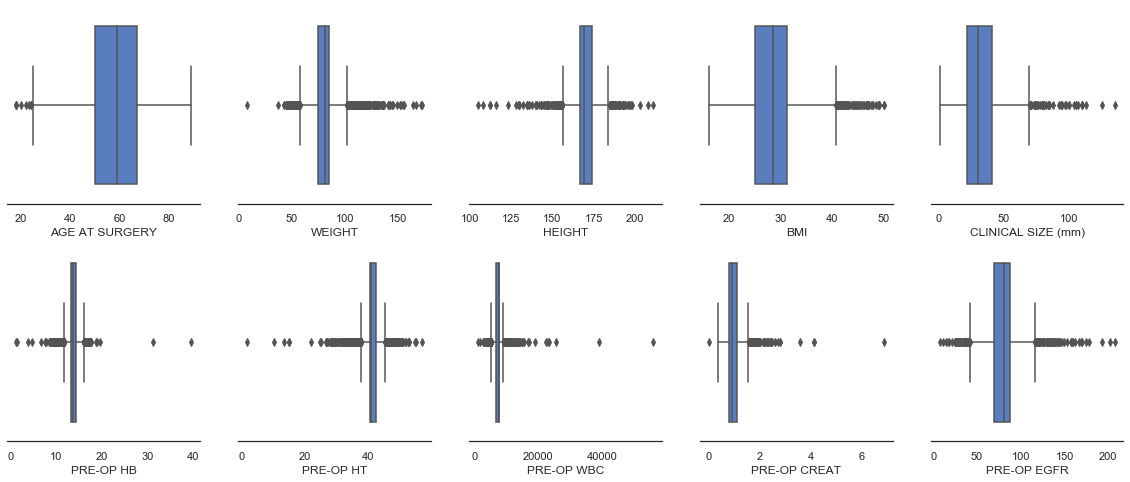

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 5, figsize=(20, 8))
sns.despine(left=True)
# Plot a simple histogram with binsize determined automatically
sns.boxplot(x_train['AGE AT SURGERY'], ax=axes[0, 0])
sns.boxplot(x_train['WEIGHT'], ax=axes[0, 1])
sns.boxplot(x_train['HEIGHT'],ax=axes[0,2])
sns.boxplot(x_train['BMI'], ax=axes[0,3])
sns.boxplot(x_train['CLINICAL SIZE (mm)'], ax=axes[0, 4])
sns.boxplot(x_train['PRE-OP HB'], ax=axes[1, 0])
sns.boxplot(x_train['PRE-OP HT'], ax=axes[1, 1])
sns.boxplot(x_train['PRE-OP WBC'], ax=axes[1, 2])
sns.boxplot(x_train['PRE-OP CREAT'],ax=axes[1,3])
sns.boxplot(x_train['PRE-OP EGFR'], ax=axes[1,4])


In [18]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
float_col = x_train.select_dtypes('float').columns
x_train[float_col] = pd.DataFrame(stdc.fit_transform(x_train[float_col]),columns=float_col).copy()
x_test[float_col] = pd.DataFrame(stdc.transform(x_test[float_col]),columns=float_col).copy()

H:\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
H:\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = LogisticRegression()
parameter_dist = {'solver':['liblinear','newton-cg','lbfgs','saga'],
                  'class_weight': [None,'balanced'] ,
                  'penalty':['l2'],
                  'max_iter':[10000]}
logit = GridSearchCV(model,parameter_dist,n_jobs=-1,scoring='roc_auc', cv = 5)

In [20]:
#train and fit to original data
classifier_logit = logit.fit(x_train, y_train)
y_logit = classifier_logit.predict(x_test)

In [21]:
classifier = classifier_logit
results_logit = pd.DataFrame(classifier.predict(x_test), columns=['pred_label'])
results_logit['pred_prob'] =  pd.DataFrame(classifier.predict_proba(x_test))[1]
results_logit['true_label'] = np.array(y_test)

In [22]:
# Logistic Regression Score Raw Data
print(classifier.best_params_)
print("\n Model Best CV score: \n" + str(classifier.best_score_))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(y_test, y_logit)))
print("\n Confusion Matrix : \n"+str(metrics.confusion_matrix(y_test, y_logit)))
print("\n Classification Report: \n"+ str(metrics.classification_report(y_test, y_logit)))
print("\n AUC-ROC: \n"+ str(metrics.roc_auc_score(y_test, results_logit['pred_prob'])))

{'class_weight': None, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}

 Model Best CV score: 
0.6645171815064499

 Model Balanced Accuracy: 
0.4991319444444444

 Confusion Matrix : 
[[575   1]
 [ 16   0]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       576
           1       0.00      0.00      0.00        16

    accuracy                           0.97       592
   macro avg       0.49      0.50      0.49       592
weighted avg       0.95      0.97      0.96       592


 AUC-ROC: 
0.6222873263888888


# Compare Classifiers

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


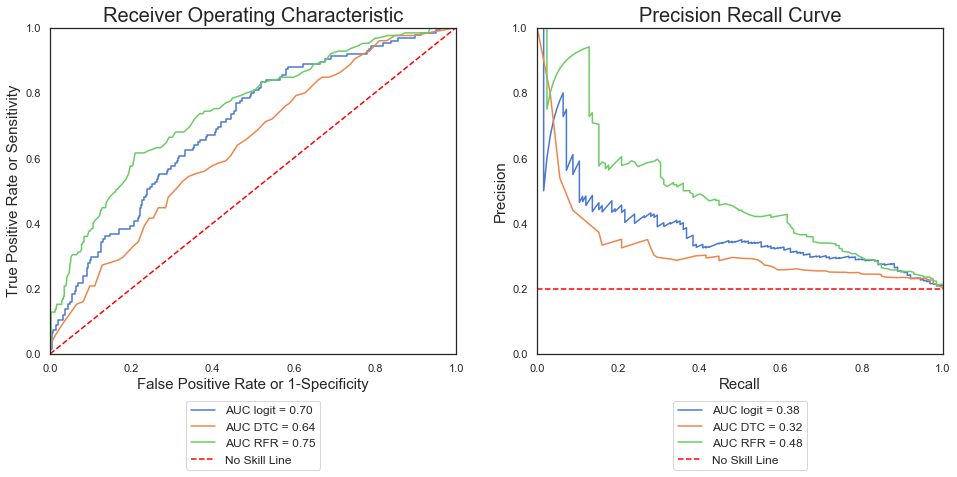

In [67]:
# Plotting AUROC Curve - Calculatae Metrics
from sklearn import metrics
def calc_aucroc_data(result):
    y_ACTUAL= result['true_label']
    scores_prob = result['pred_prob']
    fpr, tpr, thresholds = metrics.roc_curve(y_ACTUAL, scores_prob, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr, tpr, thresholds, roc_auc

def calc_aucpr_data(result):
    y_ACTUAL = result['true_label']
    scores_prob = result['pred_prob']
    yhat = result['pred_label']
    precision, recall, thresholds = metrics.precision_recall_curve(y_ACTUAL, scores_prob, pos_label=1)
    prc_auc = metrics.auc(recall,precision)
    f1 = metrics.f1_score(y_ACTUAL, yhat)
    ap = metrics.average_precision_score(y_ACTUAL, yhat)
    postives_ratio = round(sum(result['true_label'])/(len(result['true_label'])),2)
    return recall, precision, f1, prc_auc, postives_ratio

fpr_logit, tpr_logit, thresholds_logit, roc_auc_logit = calc_aucroc_data(results_logit)
recall_logit, precision_logit, f1_logit, prc_auc_logit, postives_ratio_logit = calc_aucpr_data(results_logit)

fpr_DTC, tpr_DTC, thresholds_DTC, roc_auc_DTC = calc_aucroc_data(results_DTC)
recall_DTC, precision_DTC, f1_DTC, prc_auc_DTC, postives_ratio_DTC = calc_aucpr_data(results_DTC)

fpr_RFR, tpr_RFR, thresholds_RFR, roc_auc_RFR = calc_aucroc_data(results_RFR)
recall_RFR, precision_RFR, f1_RFR, prc_auc_RFR, postives_ratio_RFR = calc_aucpr_data(results_RFR)


import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))

# Plotting AUROC Curve - Plot Curve
ax1.set_title('Receiver Operating Characteristic',fontdict={"size":20})
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate or Sensitivity', fontdict={"size":15})
ax1.set_xlabel('False Positive Rate or 1-Specificity',fontdict={"size":15})
ax1.plot(fpr_logit, tpr_logit, label = 'AUC logit = %0.2f' % roc_auc_logit)
ax1.plot(fpr_DTC, tpr_DTC, label = 'AUC DTC = %0.2f' % roc_auc_DTC)
ax1.plot(fpr_RFR, tpr_RFR, label = 'AUC RFR = %0.2f' % roc_auc_RFR)
ax1.plot([0, 1], [0, 1],linestyle='--',color='red', label = 'No Skill Line')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fontsize = 12)  

# Plotting Precision-Recall Curve - PLot Curve
ax2.set_title('Precision Recall Curve',fontdict={"size":20})
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Precision',fontdict={"size":15})
ax2.set_xlabel('Recall',fontdict={"size":15})
ax2.plot(recall_logit, precision_logit, label = 'AUC logit = %.2f' % (prc_auc_logit))
ax2.plot(recall_DTC, precision_DTC, label = 'AUC DTC = %.2f' % (prc_auc_DTC))
ax2.plot(recall_RFR, precision_RFR, label = 'AUC RFR = %.2f' % (prc_auc_RFR))
positive_class_ratio = postives_ratio_logit
ax2.plot([0, 1], [positive_class_ratio, positive_class_ratio],linestyle='--',color='red', label = 'No Skill Line')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),fontsize = 12)

fig.show()



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 30)
rfe = rfe.fit(x_test, y_test)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
x_test.columns[rfe.support_]

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train[x_test.columns[rfe.support_]])
result=logit_model.fit()
print(result.summary2())